# Characteristics of Second Order Systems

## Car Suspension: Spring-Mass-Damper System

A car suspension (shock absorbers) includes a spring and damper. The spring absorbs bumps in the road and the damper keeps the spring from oscillating too much.

![](https://www.howacarworks.com/illustration/127/coil-spring.base@1x.jpg)


We will use this classic example to understand the characteristics of second order linear systems. These ideas generalize to higher-order linear and nonlinear systems. Figure source: [How a Car Works](https://www.howacarworks.com/basics/how-car-springs-and-dampers-work)

### Mathematical Model

We will start with a free body diagram (figure source: [Wikipedia](https://en.wikipedia.org/wiki/Mass-spring-damper_model)) and sum of forces acting on mass $m$:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/663px-Mass_spring_damper.svg.png)


$$\sum F = \quad \underbrace{-kx}_{\text{Hooke's~law}} \quad + \quad \underbrace{-c \dot{x}}_{\text{damper}} \quad + \quad \underbrace{f(t)}_{\text{input}} = \quad m \underbrace{\ddot{x}}_{\text{acceleration}}$$

We can rewrite this as a coupled system of linear ODEs:

$$
\dot{v} = -\frac{k}{m} x - \frac{c}{m} v + \frac{f(t)}{m}, \qquad \dot{x} = v
$$

Let's assume the mass of the car is 450 kg per wheel. Furthermore, let's assume the spring constant $k$ is 100,000 N/m and the dampening constant $c$ is 2,000 Ns/m. Of course, this is a simplified model for a car suspection. See [this example](https://ctms.engin.umich.edu/CTMS/index.php?example=Suspension&section=SystemModeling) of a more sophisticate model of a bus' suspension.

### Numeric Simulation

Let's consider the empty car starts at rest. Then at time zero, the driver, who weighs 80 kg, gets into the car. The external forcing function is $-80~\text{kg} \times 9.81~\text{m}~\text{s}^{-2} \times 1/4 = 196~\text{N}$ per tire. 

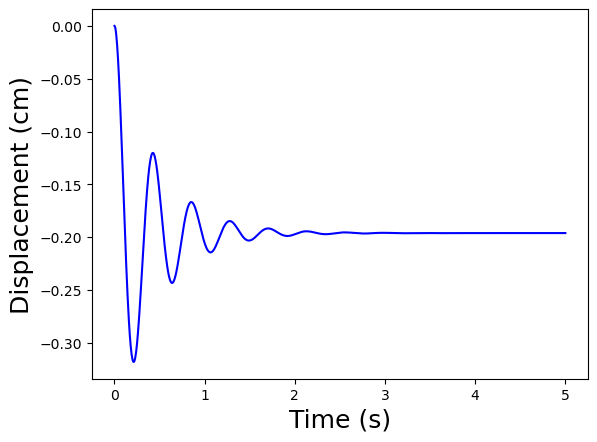

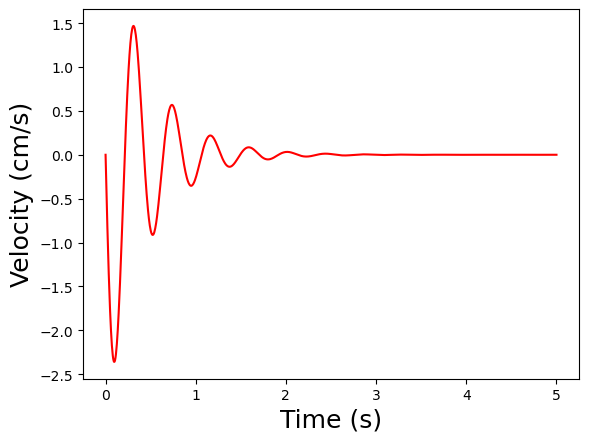

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

def suspension(t, y, f= lambda t: 0.0, k=1E5, c=2E3, m=450):
    ''' Linear model of a car suspension system

    Arguments:
    t: time (s)
    y: array of the state variables [x, v] 
        where x is the displacement (m) and v is the velocity (m/s)
    f: extenal forcing function (N)
    k: spring constant (N/m)
    c: damping constant (Ns/m)
    m: mass per wheel (kg)
    '''

    # unpack state variables
    x, v = y

    # derivative of velocity
    vdot = (-k*x - c*v + f(t))/m

    # derivative of displacement
    xdot = v

    return np.array([xdot, vdot])


def simulate_driver_getting_in(driver_mass=80, k=1E5, c=2E3):
    ''' Simulate the suspension system with a step input (driver getting in)

    Arguments:
    driver_mass: mass of the driver (kg)
    k: spring constant (N/m)
    c: damping constant (Ns/m)

    '''


    initial_conditions = [0.0, 0.0]
    t_span = [0, 5]
    t_eval = np.linspace(*t_span, 1000)
    g = 9.81 # m/s^2

    driver_gets_in = lambda t,y: suspension(t, y, lambda t_: -driver_mass*g/4, k, c)

    solution = scipy.integrate.solve_ivp(driver_gets_in, t_span, initial_conditions, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0]*100,color='b')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Displacement (cm)',fontsize=18)
    plt.show()

    plt.plot(solution.t, solution.y[1]*100,color='r')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Velocity (cm/s)',fontsize=18)
    plt.show()

simulate_driver_getting_in()

### Activity

Simulate the following what if scenarios:
* Double the spring stiffness
* Double the strength of the dampers
* Four people instead of one person gets in the car

Do the results make sense?

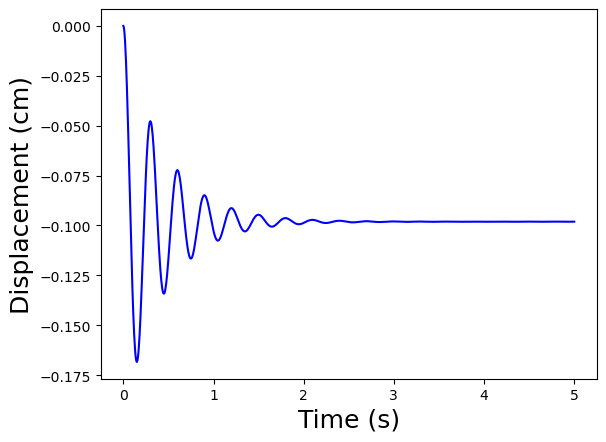

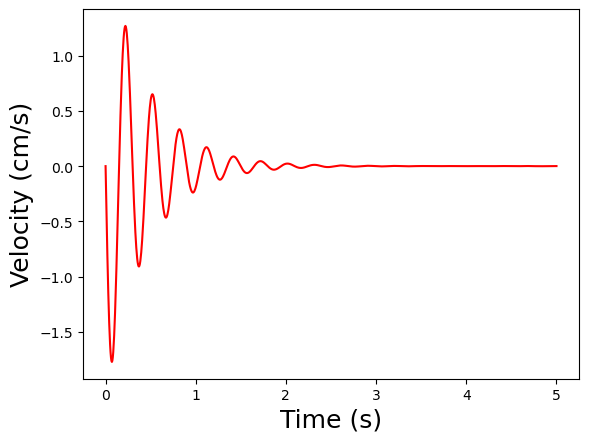

In [2]:
# Double the spring constant
simulate_driver_getting_in(k=2E5)

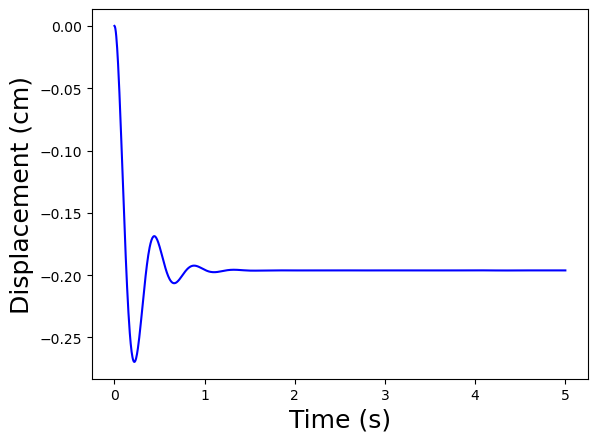

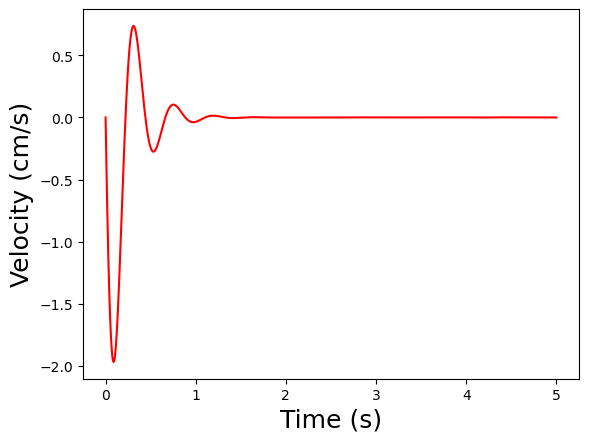

In [3]:
# Double the damping constant
simulate_driver_getting_in(c=4E3)

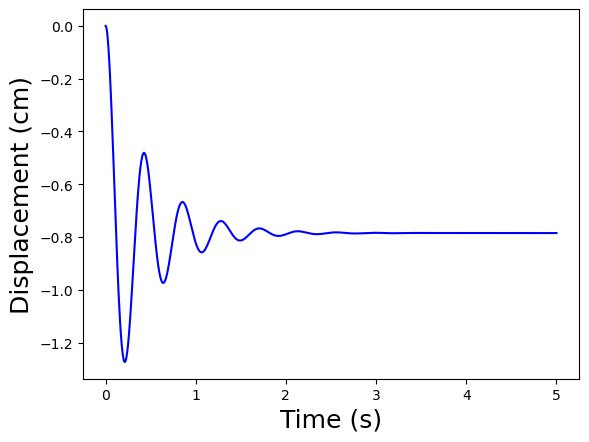

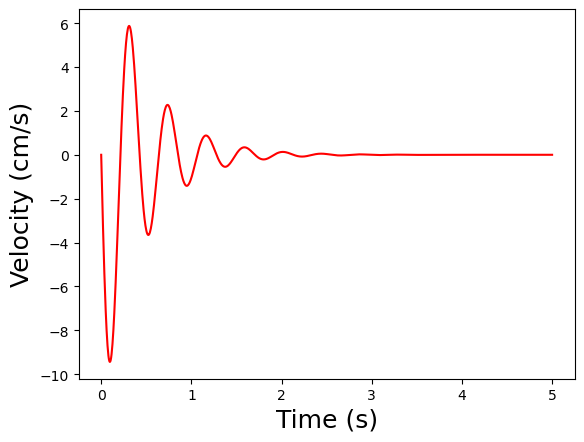

In [4]:
# Four people get in the car
simulate_driver_getting_in(driver_mass=4*80)

## Second Order Linear ODE Systems

### Generalized Model

More generally, the second order linear system with a single state is:

$$
\ddot{x} + \omega_{n}^2 x + 2 \zeta \omega_{n} \dot{x} = \omega_n^2 K_p u(t)
$$

Where:
* $\omega_n$ is the natural frequency, i.e., frequency of oscillations with no forcing $u(t) = 0$, 
* $\zeta$ is the damping coefficient, and 
* $K_p$ is the gain.

This can be also written using the [second order characteristic time](https://apmonitor.com/pdc/index.php/Main/SecondOrderSystems) $\tau_s = \omega_n^{-1}$:

$$
\tau_s^2 \ddot{x} + 2 \zeta \tau_s \dot{x} + x = K_p u(t)
$$

These general forms are convienent because there are three "modes" of the analytic solution, depending on the value of $\zeta$. Here $\bar{x}$ is the steady-state after a step change in the input.

### Overdamped ($\zeta > 1$)

$$
x(t) = \bar{x} \left(1 - e^{-\zeta \omega_n t} \left[ \cosh \left(t \omega_n \sqrt{\zeta^2 - 1} \right) + \frac{\zeta}{\sqrt{\zeta^2 - 1}}   \sinh \left(t \omega_n \sqrt{\zeta^2 - 1}  \right) \right]   \right)
$$

### Critically Damped ($\zeta = 1$)

$$
x(t) = \bar{x} \left[1 - \left(1 + t \omega_n \right) e^{-t \omega_n} \right]
$$

### Underdamped ($\zeta < 1$)

$$
x(t) = \bar{x} \left(1 - e^{-\zeta \omega_n t} \left[ \cos \left(t \omega_n \sqrt{1 - \zeta^2} \right) + \frac{\zeta}{\sqrt{1 - \zeta^2}}   \sin \left(t \omega_n \sqrt{1 - \zeta^2}  \right) \right]   \right)
$$

### Comparison of Modes

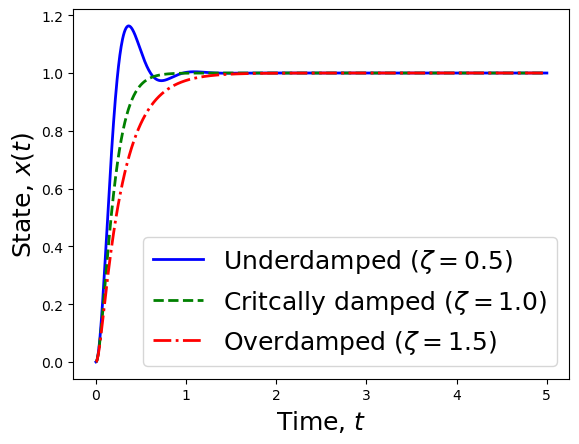

In [5]:
def second_order(t, xbar=1.0, zeta=1.0, omega=10):
    ''' Analytic solution of second order system

        Arguments:
            t: times to evaluate solution
            xbar: steady-state after step response
            zeta: damping coefficient
            omega: natural frequency
        
        Note: t and omega need to have consistent units (time and inverse time)

        Returns:
            x(t), states x evaluated at times t
    '''

    
    if np.abs(zeta - 1) < 1E-6:
        # Critically damped, zeta approx 1
        # Hint: need the tolerance 1E-6 because of float point errors
        return xbar*(1 - (1+t*omega)*np.exp(-t*omega))
    elif zeta > 1:
        # Overdamped, zeta > 1
        return xbar*(1-np.exp(-zeta*t*omega)*(np.cosh(t*omega*np.sqrt(zeta**2-1)) + (zeta/np.sqrt(zeta**2-1))*np.sinh(t*omega*np.sqrt(zeta**2 - 1))))
    else:
        # Underdampled (oscillates), zeta < 1
        return xbar*(1-np.exp(-zeta*t*omega)*(np.cos(t*omega*np.sqrt(1-zeta**2)) + (zeta/np.sqrt(1-zeta**2))*np.sin(t*omega*np.sqrt(1-zeta**2))))
    

teval = np.linspace(0,5,1001)
x_over = second_order(teval, zeta=1.5)
x_crit = second_order(teval, zeta=1.0)
x_under = second_order(teval, zeta=0.5)

plt.plot(teval,x_under,color="blue",linestyle="-",label="Underdamped ($\zeta = 0.5$)",linewidth=2)
plt.plot(teval,x_crit, color="green",linestyle="--",label="Critcally damped ($\zeta = 1.0$)",linewidth=2)
plt.plot(teval,x_over,color="red",linestyle="-.",label="Overdamped ($\zeta=1.5$)",linewidth=2)
plt.xlabel("Time, $t$",fontsize=18)
plt.ylabel("State, $x(t)$",fontsize=18)
plt.legend(fontsize=18)


### Spring-Mass-Damper Example

Now let's convert the spring-mass-damper systems into the general form. Recall,

$$
\dot{v} = -\frac{k}{m} x - \frac{c}{m} v + \frac{f(t)}{m}, \qquad \dot{x} = v
$$

which is equivalent to:

$$
\ddot{x} + \frac{k}{m} x + \frac{c}{m} \dot{x} = \frac{f(t)}{m}
$$

Comparing this to the general form, 

$$
\ddot{x} + \omega_{n}^2 x + 2 \zeta \omega_{n} \dot{x} = \omega_n^2 K_p u(t)
$$

we see that 

$$
\omega_n = \sqrt{\frac{k}{m}}, \qquad \zeta = \frac{c}{2 m \omega_n} = \frac{c}{2 \sqrt{k m}}~.
$$

Let's revist our example and run some calculations.

In [6]:
def suspension(t, y, f= lambda t: 0.0, k=1E5, c=2E3, m=450):
    ''' Linear model of a car suspension system

    Arguments:
    t: time (s)
    y: array of the state variables [x, v] 
        where x is the displacement (m) and v is the velocity (m/s)
    f: extenal forcing function (N)
    k: spring constant (N/m)
    c: damping constant (Ns/m)
    m: mass per wheel (kg)
    '''

    # unpack state variables
    x, v = y

    # derivative of velocity
    vdot = (-k*x - c*v + f(t))/m

    # derivative of displacement
    xdot = v

    return np.array([xdot, vdot])


def simulate_driver_getting_in(driver_mass=80, k=1E5, c=2E3):
    ''' Simulate the suspension system with a step input (driver getting in)

    Arguments:
    driver_mass: mass of the driver (kg)
    k: spring constant (N/m)
    c: damping constant (Ns/m)

    '''


    initial_conditions = [0.0, 0.0]
    t_span = [0, 5]
    t_eval = np.linspace(*t_span, 1000)
    g = 9.81 # m/s^2

    driver_gets_in = lambda t,y: suspension(t, y, lambda t_: -driver_mass*g/4, k, c)

    solution = scipy.integrate.solve_ivp(driver_gets_in, t_span, initial_conditions, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0]*100,color='b')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Displacement (cm)',fontsize=18)
    plt.show()

    plt.plot(solution.t, solution.y[1]*100,color='r')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Velocity (cm/s)',fontsize=18)
    plt.show()

def car_revisited(car_mass = 4*450, driver_mass=80, k=1E5, c=2E3, verbose=True):
    ''' Convert car suspension example into 2nd order system general form

    Arguments:
        car_mass: total mass of the vehicle without driver (kg)
        driver_mass: total mass of the driver (kg)
        k: spring constant (N/m)
        c: damping constant (Ns/m)

    Returns:
        omega_n: natural frequency (1/s)
        zeta: critical coefficient (dimensionless)

    Notes:
        All masses are divided by 4 within the calculations to convert from total to per wheel.
        User should input total masses.

        This function returns omega and zeta for the loaded car
    '''

    if verbose:
        print("Spring constant, k =",round(k,0),"N/m")
        print("Damping constant, c =",round(c,0),"Ns/m")

    m = car_mass/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))
    
    if verbose:
        print("\nEmpty car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "rad/s")
        print("zeta =",round(zeta,2), "dimensionless")
        
    m = (car_mass + driver_mass)/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))

    if verbose:
        print("\nLoaded car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "rad/s")
        print("zeta =",round(zeta,2), "dimensionless")

    return omega_n, zeta

car_revisited()

Spring constant, k = 100000.0 N/m
Damping constant, c = 2000.0 Ns/m

Empty car, m = 450.0 kg per wheel
omega_n = 14.91 rad/s
zeta = 0.39 dimensionless

Loaded car, m = 470.0 kg per wheel
omega_n = 14.59 rad/s
zeta = 0.38 dimensionless


(14.586499149789455, 0.3819227559309533)

**Discussion Questions**:
* Is it okay to ignore how the change in mass $m$ impacts $\omega_n$ and $\zeta$ when analyzes the dynamic response of the suspension?
* How would you tune the suspension, i.e., change $k$ or $c$, to make it critically damped or overdamped?
* Is it better to have an overdamped, underdamped, or critically damped suspension?

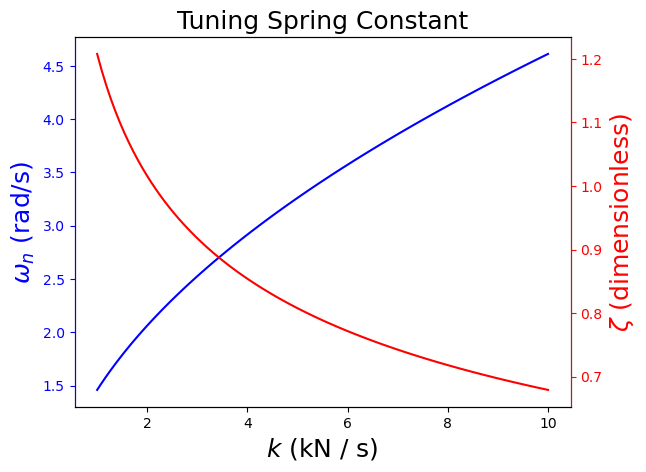

In [7]:
k_adjust = np.linspace(1E3,1E4,101)

omega, zeta = car_revisited(k=k_adjust,verbose=False)

fig, ax1 = plt.subplots()

ax1.plot(k_adjust/1E3,omega,color="blue")
ax1.set_ylabel('$\omega_n$ (rad/s)', color='blue',fontsize=18)
ax1.set_xlabel('$k$ (kN / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')

ax1.set_title('Tuning Spring Constant',fontsize=18)

ax2 = ax1.twinx()
ax2.plot(k_adjust/1E3,zeta,color='red')
ax2.set_ylabel('$\zeta$ (dimensionless)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()


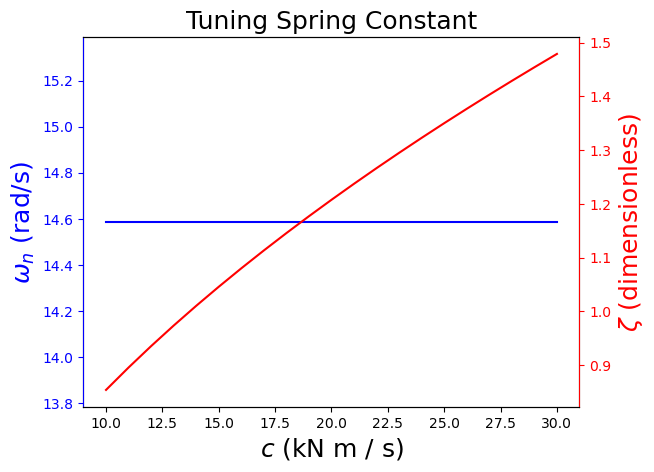

In [8]:
c_adjust = np.linspace(1E4,3E4,21)

omega, zeta = car_revisited(c=c_adjust,verbose=False)

# Convert from scalar to vector
omega = omega*np.ones(len(c_adjust))

fig, ax1 = plt.subplots()

ax1.plot(c_adjust/1E3,omega,color="blue")
ax1.set_ylabel('$\omega_n$ (rad/s)', color='blue',fontsize=18)
ax1.set_xlabel('$c$ (kN m / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')

ax1.set_title('Tuning Spring Constant',fontsize=18)

ax2 = ax1.twinx()
ax2.plot(c_adjust/1E3,zeta,color='red')
ax2.set_ylabel('$\zeta$ (dimensionless)', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.show()

### Sensitivity of Eigenvalues

The dynamic response of the system depends on the eigenvalues of the (linear) differential equations.

The **real componenent** of the eigenvalues tell us...
* One or more positive real components of the eigenvalues --> system is unstable and one of the states will diverge to positive or negative infinity
* All negative real components of the eigenvalues --> system is stable and will approach steady-state
* One or more zero real components of the eigenvalues --> some of the states will neither decay or grow, often coincides with oscillations

The **imaginary components** of the eigenvalues tell us...
* Non-zero imaginary components of two of more eigenvales --> system response will oscillate
* All imaginary components of eigenvalues are zero --> system response will not oscillate
* Remember that imaginary eigenvalues come in conjugate pairs

Let's see these properties in action with our spring-mass-damper example. We start by writing the linear system in cannonical state-space form:

$$
\underbrace{\begin{bmatrix}
\dot{v} \\
\dot{x}
\end{bmatrix}}_{\mathbf{\dot{x}}} = 
\underbrace{\begin{bmatrix}
- \frac{c}{m} & -\frac{k}{m} \\
1 & 0
\end{bmatrix}}_{\mathbf{A}}
\underbrace{\mathbf{\begin{bmatrix} v \\ x
\end{bmatrix}}}_{\mathbf{x}} + 
\underbrace{\begin{bmatrix}
\frac{1}{m} \\ 0
\end{bmatrix}}_{\mathbf{B}}
\underbrace{f(t)}_{\mathbf{u}}
$$

Next, we will calculate the eigenvalues of $\mathbf{A}$.

In [9]:
import sympy
c, m, k = sympy.symbols('c m k')
A = sympy.Matrix([[-c/m, -k/m],[1, 0]])
print("A =\n",A)

print("Eigenvalues(A) =",)
print(A.eigenvals())

A =
 Matrix([[-c/m, -k/m], [1, 0]])
Eigenvalues(A) =
{-c/(2*m) - sqrt(c**2 - 4*k*m)/(2*m): 1, -c/(2*m) + sqrt(c**2 - 4*k*m)/(2*m): 1}


$$\lambda_1 = \frac{-c}{2m} - \frac{\sqrt{c^2 - 4 k m}}{2 m}, \qquad \lambda_2 = \frac{-c}{2m} + \frac{\sqrt{c^2 - 4 k m}}{2 m}$$

We see these eigenvalues are imaginary when

$$
c^2 < 4 k m \Leftrightarrow \frac{c^2}{4 k m} < 1 \Leftrightarrow \zeta^2 < 1
$$

The real components of both eigenvalues are positive when

$$
\frac{c}{2m} < \frac{\sqrt{c^2 - 4 k m}}{2m} \Leftrightarrow c < \sqrt{c^2 - 4 k m} \Leftrightarrow c^2 < c^2 - 4 k m
$$

This would require $km < 0$, which is not possible because $k > 0$, $c > 0$, and $m > 0$ for the model to be physically realistic. Therefore, the real components must be negative.

This analysis explains the behavior of our simulations for this system so far!

In [10]:
def eigenvalues_car_revisited(car_mass = 4*450, driver_mass=80, k=1E5, c=2E3, verbose=True):
    ''' Convert car suspension example into 2nd order system general form

    Arguments:
        car_mass: total mass of the vehicle without driver (kg)
        driver_mass: total mass of the driver (kg)
        k: spring constant (N/m)
        c: damping constant (Ns/m)

    Returns:
        eigenvalues

    Notes:
        All masses are divided by 4 within the calculations to convert from total to per wheel.
        User should input total masses.

        This function assumes k and c are scalars!

    '''

    
    
    if verbose:
        print("Spring constant, k =",round(k,0),"N/m")
        print("Damping constant, c =",round(c,0),"Ns/m")

    m = car_mass/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))
    A = np.array([[-c/m, -k/m],[1.,0]])
    evals, evec = np.linalg.eig(A)
    
    if verbose:
        print("\nEmpty car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "1/s")
        print("zeta =",round(zeta,2), "dimensionless")
        print("eignvalues=",evals)

    m = (car_mass + driver_mass)/4
    omega_n = np.sqrt(k/m)
    zeta = np.sqrt(c/(2*omega_n*m))
    A = np.array([[-c/m, -k/m],[1.,0]])
    evals, evec = np.linalg.eig(A)

    if verbose:
        print("\nLoaded car, m =", round(m,1),"kg per wheel")
        print("omega_n =",round(omega_n,2), "1/s")
        print("zeta =",round(zeta,2), "dimensionless")
        print("eignvalues=",evals)

    return evals

eigenvalues_car_revisited()

Spring constant, k = 100000.0 N/m
Damping constant, c = 2000.0 Ns/m

Empty car, m = 450.0 kg per wheel
omega_n = 14.91 1/s
zeta = 0.39 dimensionless
eignvalues= [-2.22222222+14.74055462j -2.22222222-14.74055462j]

Loaded car, m = 470.0 kg per wheel
omega_n = 14.59 1/s
zeta = 0.38 dimensionless
eignvalues= [-2.12765957+14.43048933j -2.12765957-14.43048933j]


array([-2.12765957+14.43048933j, -2.12765957-14.43048933j])

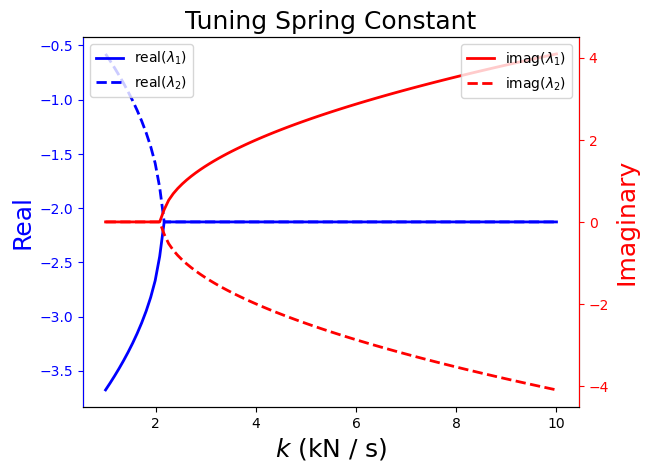

In [11]:
# Perform sensitivity analysis of eigenvalues to k
k_adjust = np.linspace(1E3,1E4,101)

evals = np.zeros((len(k_adjust),2),dtype = complex)


for i in range(len(k_adjust)):
    evals[i,:] = eigenvalues_car_revisited(k=k_adjust[i],verbose=False)

fig, ax1 = plt.subplots()

ax1.plot(k_adjust/1E3,np.real(evals[:,0]),label="real($\lambda_1$)",color="blue",linestyle="-",linewidth=2)
ax1.plot(k_adjust/1E3,np.real(evals[:,1]),label="real($\lambda_2$)",color="blue",linestyle="--",linewidth=2)
ax1.set_ylabel('Real', color='blue',fontsize=18)
ax1.set_xlabel('$k$ (kN / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.set_title('Tuning Spring Constant',fontsize=18)
plt.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(k_adjust/1E3,np.imag(evals[:,0]),label="imag($\lambda_1$)",color='red',linestyle="-",linewidth=2)
ax2.plot(k_adjust/1E3,np.imag(evals[:,1]),label="imag($\lambda_2$)",color='red',linestyle="--",linewidth=2)
ax2.set_ylabel('Imaginary', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.legend(loc='upper right')
plt.show()


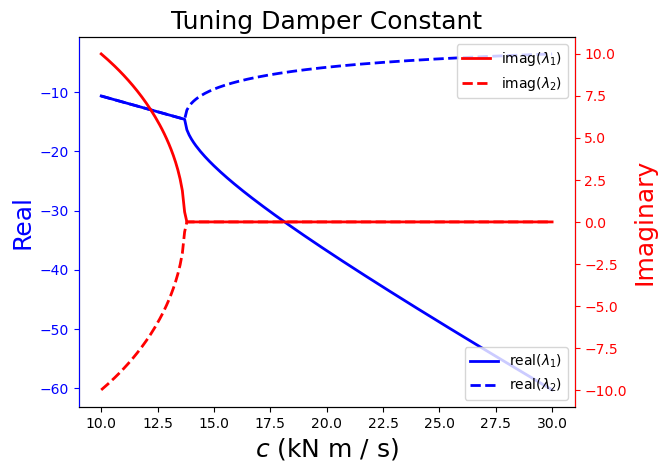

In [12]:
# Perform sensitivity analysis of eigenvalues to c

c_adjust = np.linspace(1E4,3E4,201)

evals = np.zeros((len(c_adjust),2),dtype = complex)

for i in range(len(c_adjust)):
    evals[i,:] = eigenvalues_car_revisited(c=c_adjust[i],verbose=False)

fig, ax1 = plt.subplots()

ax1.plot(c_adjust/1E3,np.real(evals[:,0]),label="real($\lambda_1$)",color="blue",linestyle="-",linewidth=2)
ax1.plot(c_adjust/1E3,np.real(evals[:,1]),label="real($\lambda_2$)",color="blue",linestyle="--",linewidth=2)
ax1.set_ylabel('Real', color='blue',fontsize=18)
ax1.set_xlabel('$c$ (kN m / s)',fontsize=18)
ax1.tick_params(axis='y', color='blue', labelcolor='blue')
ax1.set_title('Tuning Damper Constant',fontsize=18)
plt.legend(loc='lower right')
ax2 = ax1.twinx()
ax2.plot(c_adjust/1E3,np.imag(evals[:,0]),label="imag($\lambda_1$)",color='red',linestyle="-",linewidth=2)
ax2.plot(c_adjust/1E3,np.imag(evals[:,1]),label="imag($\lambda_2$)",color='red',linestyle="--",linewidth=2)
ax2.set_ylabel('Imaginary', color='red',fontsize=18)
ax2.tick_params(axis='y', color='red', labelcolor='red')
ax2.spines['right'].set_color('red')
ax2.spines['left'].set_color('blue')
plt.legend(loc='upper right')
plt.show()

## General Linear ODE Systems

Second order systems (e.g., mass-spring-damper) are excellent to understand the types of dynamic system responses. But we will need to analyze higher order systems in practice.

Recall the general state-space of a linear ODE system:

$$\begin{align*}
\mathbf{\dot{x}} &= \mathbf{A} \mathbf{x}(t) + \mathbf{B} \mathbf{u}(t)~, \\
\mathbf{y} &= \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}~,
\end{align*}
$$

where $\mathbf{x}$ are the state variables and $\mathbf{y}$ are the measured/observed variables. This is called a **time-invarient linear system** because the ODE system is linear with respect to the states $\mathbf{x}$ and the matrices $\mathbf{A}$ and $\mathbf{B}$ are constants and do not depend on time.

Many chemical engineering examples are more complicated, which means matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, or $\mathbf{D}$ depend on time $t$ or states $\mathbf{x}$ or both. But to analyze stability, we can construct linear approximations of the form above around the steady-states of interest. Hence building up our toolbox of techniques to analyze LTI systems is important!

### Analytic Solution

The LTI [analytic solution](https://web.mit.edu/2.14/www/Handouts/StateSpaceResponse.pdf) is 

$$
\mathbf{x}(t) = \mathbf{\Phi}(t) \mathbf{x}(0) + \int_{0}^{t}\mathbf{\Phi}(t - \tau) \mathbf{B} \mathbf{u}(\tau) d \tau
$$

where

$$
\mathbf{\Phi}(t) = e^{-\mathbf{A}t} = \left( \mathbf{I} + \mathbf{A} t + \frac{\mathbf{A}^2 t^2}{2!} + ... + \frac{\mathbf{A}^k t^k}{k!} + ...\right)
$$

There are many ways to compute $\mathbf{\Phi}(t)$. For the case where $\mathbf{u}(t) = \mathbf{0}$, i.e., no external input, the analytic solution of $\dot{x} = \mathbf{A} \mathbf{x}$ is

$$
\mathbf{x}(t) = \left[\mathbf{M} e^{\mathbf{\Lambda t}} \mathbf{M}^-1 \right] \mathbf{x}(0)
$$

where the columns of $\mathbf{M}$ and the eigenvectors ($\mathbf{v}_1$, ..., $\mathbf{v}_n$) of $\mathbf{A}$ and the diagonal of $\Lambda$ are the eigenvalues ($\lambda_1$, ..., $\lambda_n$) of $\mathbf{A}$:

$$
\mathbf{M} = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}, \qquad \Lambda = 
\begin{bmatrix} \lambda_1 & 0 & \dots & 0 \\
0 & \lambda_1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_n
\end{bmatrix}
$$

Because $\Lambda$ is a diagnol matrix, the matrix exponential simplies:

$$
e^{\mathbf{\Lambda t}} = 
\begin{bmatrix} 
e^{\lambda_1 t} & 0 & \cdots & 0 \\
0 & e^{\lambda_2 t} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n t}
\end{bmatrix}
$$

The situation is more nuanced if the eigenvalues are not distinct. Nevertheless, this gives the general idea and we will press on.

How does this related to our interpretation of the eigenvalues in the spring-mass-damper example above?

Recall **Euluer's formula**:

$$
e^{x + i y} = e^{x}(\cos y + i \sin y)
$$

Using Euler's formula, we can express cosine, sine, hyperbolic cosine, and hyperbolic sine as:

$$\cos y = \frac{e^{i y} + e^{-iy}}{2}, \qquad \sin y = \frac{e^{i y} - e^{i y}}{2 i}$$

$$\cosh y = \frac{e^{y} + e^{-y}}{2}, \qquad \sinh y = \frac{e^{y} - e^{-y}}{2}$$

If the eigenvalues are real and the imaginary component is zero, i.e., $y = 0$ in Euler's formula, then the solution does not oscillate and constains a hyperbolic cosine and hyperbolic sine. Take a minute to review the analytic solution for the overdamped system ($\zeta > 1$).

If the eigenvalues include a non-zero imaginary component, then the solution includes a sine or cosine and oscillates. Take a minute to review the analytic solution for the underdamped system $\zeta < 1$.

It is possible for a large system ($n > 2$) to have some eigenvalues that are overdamped and some that are underdamped. Recall our second order system has two eigenvalues and imaginary eigenvalues come in conjugate pairs. This means for a second order system, both eigenvalues have either a non-zero or zero imaginary component.

### Simulation with `scipy.signal`

The good news is that `scipy` has a functions to model and simulate LTI systems. This means you do not need to explicitly code up the analytic solution of eigendecomposition above.

Let's define the spring-mass-damper system as a state-space model. We will use the `StateSpace` function in `scipy.signal`, which takes the matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, and $\mathbf{D}$ as arguments.

In [13]:
from scipy.signal import StateSpace, lsim, bode

# Define constants
car_mass = 4*450 # kg
driver_mass=80 # kg
k=1E5 # N/m
c=2E3 # Nm/s
m = (car_mass)/4 # kg
g = 9.81 # m/s^2

# Define the state space model
A = np.array([[-c/m, -k/m],[1.,0]])
B = np.array([[1/m],[0]])
C = np.array([[0,1]])
D = np.array([[0]])

# Print state space model
sys = StateSpace(A,B,C,D)
print(sys)

StateSpaceContinuous(
array([[  -4.44444444, -222.22222222],
       [   1.        ,    0.        ]]),
array([[0.00222222],
       [0.        ]]),
array([[0, 1]]),
array([[0]]),
dt: None
)


Next, let's simulate the step response of a driver getting into the car. We will use the [`lsim` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html) from `scipy.signal` which takes as arguments:
* `sys` which is a LTI system, e.g., created using `StateSpace`
* `T` which is the time point, which must be evenly spaced. We use `numpy.linspace` to create this time grid.
* `U` which is the control grid defined for the time grid `T`. By default, `lsim` with linearly interpolate `U`. Another option is zero-order hold, which means a piecewise constant signal for `U`, i.e., a sequence of steps.
* `X0` which are the initial conditions for the states.

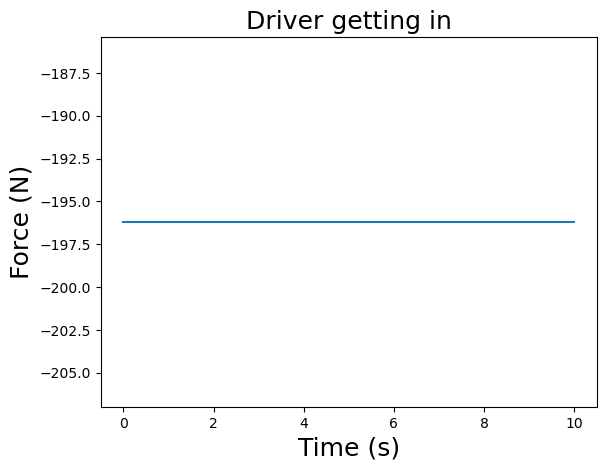

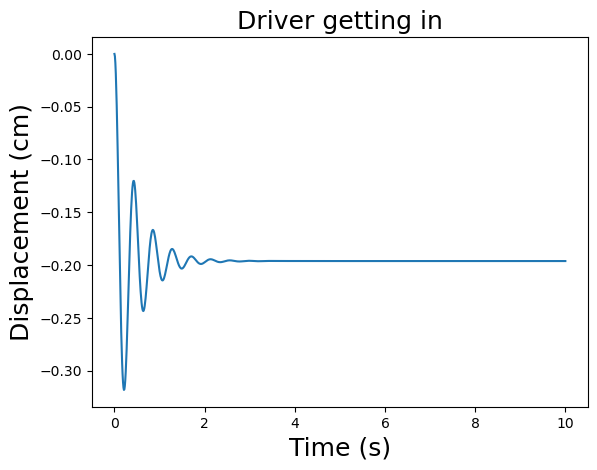

In [14]:
# Define initial conditions
x0 = [0, # m/s
      0] # m

# Define the time vector
t = np.linspace(0,10,1000)

# Calculate the input signal on the time grid
u = (-driver_mass*g/4)*np.ones(len(t)) # N

# Plot the input signal
plt.plot(t,u)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Force (N)',fontsize=18)
plt.title('Driver getting in',fontsize=18)
plt.show()

# Simulate the system using scipy.signal.lsim
t_, yout, xout = lsim(sys, U=u, T=t, X0=x0)

# Plot the output signal
plt.plot(t_,yout*100)
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Displacement (cm)',fontsize=18)
plt.title('Driver getting in',fontsize=18)
plt.show()

## Frequency Response

What is our system experiences period excitement, such as driving over a series of speed bumps at constant speed?

Let's say the external force $f(t) = u(t)$ experienced by our spring-mass-damper system is a sine wave:

$u(t) = A \sin(\omega t)$ where $A$ is the amplitude, $\omega$ is the frequency, and $\phi$ is the phase shift.

What is the response of the system subject to this dynamic response?

### Simulate Driving Over Speed Bumps

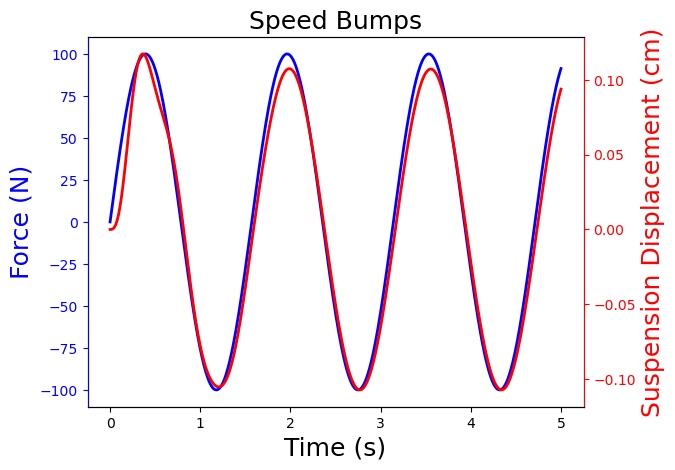

In [15]:
def simulate_bumps(t, A=100, omega=4, title=None):
    ''' Simulate driving over bumps

    Arguments:
        A: amplitude (N)
        omega: frequency (rad/s)
        phi: phase angle (rad)

    Returns:
        Nothing

    Action:
        Creates plot
    '''

    # Time domain, s
    t = np.linspace(0,5,1000)

    # External forcing function, N
    u = A*np.sin(omega*t)

    # Initial conditions
    x0 = [0, # m/s
        0] # m

    # Simulate linear system with scipy.signal.lsim
    t_, yout, xout = lsim(sys, U=u, T=t, X0=x0)

    # Create plot
    fig, ax1 = plt.subplots()

    # Plot forcing function of left y axis
    ax1.plot(t,u,label="u(t)",color="blue",linestyle="-",linewidth=2)
    ax1.set_ylabel('Force (N)', color='blue',fontsize=18)
    ax1.set_xlabel('Time (s)',fontsize=18)
    ax1.tick_params(axis='y', color='blue', labelcolor='blue')
    if title is not None:
        ax1.set_title(title,fontsize=18)

    # Plot suspension displacement on right y axis
    ax2 = ax1.twinx()
    ax2.plot(t_,yout*100,label="x(t)",color='red',linestyle="-",linewidth=2)
    ax2.set_ylabel('Suspension Displacement (cm)', color='red',fontsize=18)
    ax2.tick_params(axis='y', color='red', labelcolor='red')

    # Update colors and show plot
    ax2.spines['right'].set_color('red')
    ax2.spines['left'].set_color('blue')
    plt.show()

simulate_bumps(t, A=100, omega=4, title="Speed Bumps")


### Bode Analysis

We can see in this example the input $u(t)$ is a sine wave,

$$
u(t) = A \sin(\omega t)
$$

and the output response is a shifted sine wave with a different amplitude:

$$
y(t) = y_0 \sin(\omega t + \psi)
$$

A [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) relates the gain of the system $K$ and the phase shift $\psi$ to the input frequency $\omega$.

We will use `scipy.signal` to construct Bode plots. In a "classical controls class", students often learn how to [draw Bode plots](https://en.wikipedia.org/wiki/Bode_plot) by hand!

/Users/adowling/opt/anaconda3/envs/controls/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1101: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


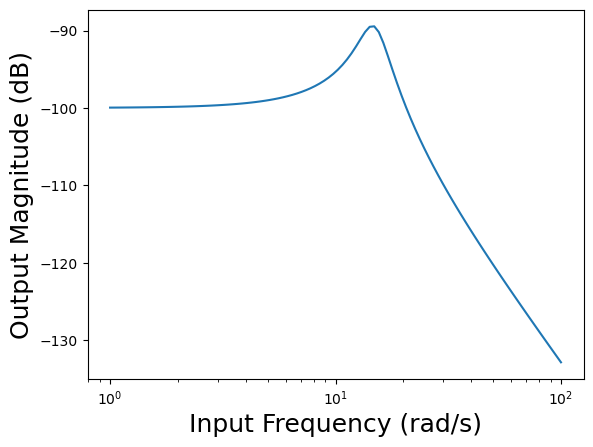

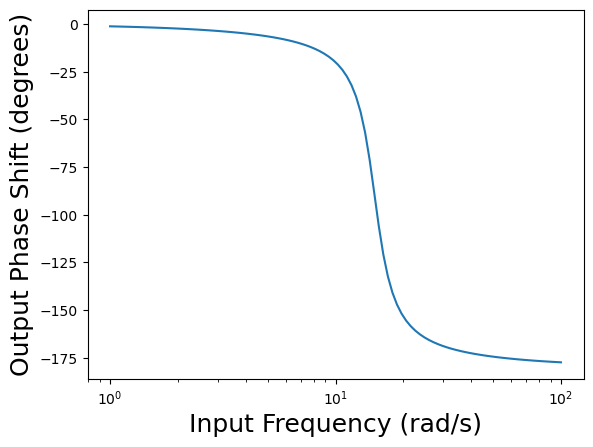

In [16]:
# Perform Bode analysis using the StateSpace model stored in `sy`
w, mag, phase = bode(sys)

# Plot the magnitude of the output signal as a function of input signal frequency
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.xlabel('Input Frequency (rad/s)',fontsize=18)
plt.ylabel('Output Magnitude (dB)',fontsize=18)
plt.show()

# Plot the phase shift of the output signal as a function of input signal frequency
plt.figure()
plt.semilogx(w, phase)
plt.xlabel('Input Frequency (rad/s)',fontsize=18)
plt.ylabel('Output Phase Shift (degrees)',fontsize=18)
plt.show()

### Simulate Driving Over a Rumble Strip

Based on the analysis above, let's consider a higher frequency oscillation, such as driving over a rumple strip at high speed.

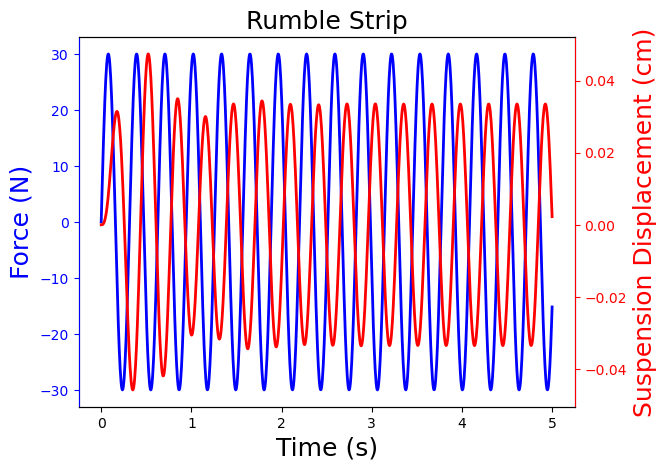

In [17]:
simulate_bumps(t, A=30, omega=20, title="Rumble Strip")

We see the higher frequency forcing function results in a larger phase shift, which is expected based on the Bode plot.

## Take Away Messages

1. State-space form with matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, and $\mathbf{D}$ is convenient to model dynamical systems
2. The characteristics of the response depends on the eigenvalues of $\mathbf{A}$
3. Looking forward a few weeks, we will design control laws, i.e., formulas to calculate $\mathbf{u}$, that shape the eigenvalues of the closed loop dynamics